In [56]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [57]:
# Importing Data Sets
train_df = pd.read_csv('Train .csv')
test_df = pd.read_csv('Test .csv')

In [58]:
train_df.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [59]:
test_df.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing
0,tour_1,AUSTRALIA,45-64,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,Yes,10,3,Cash,Yes,Wildlife
1,tour_100,SOUTH AFRICA,25-44,Friends/Relatives,0.0,4.0,Business,Wildlife tourism,Tanzania Mission Abroad,Package Tour,...,No,No,No,No,No,13,0,Cash,No,"Wonderful Country, Landscape, Nature"
2,tour_1001,GERMANY,25-44,Friends/Relatives,3.0,0.0,Leisure and Holidays,Beach tourism,"Friends, relatives",Independent,...,No,No,No,No,No,7,14,Cash,No,No comments
3,tour_1006,CANADA,24-Jan,Friends/Relatives,2.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,No,0,4,Cash,Yes,Friendly People
4,tour_1009,UNITED KINGDOM,45-64,Friends/Relatives,2.0,2.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Package Tour,...,Yes,Yes,No,No,No,10,0,Cash,Yes,Friendly People


In [60]:
# check for missing values on both datasets
train_df.isnull().sum()

ID                          0
country                     0
age_group                   0
travel_with              1114
total_female                3
total_male                  5
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           313
total_cost                  0
dtype: int64

In [61]:
test_df.isnull().sum()

ID                         0
country                    0
age_group                  0
travel_with              327
total_female               1
total_male                 2
purpose                    0
main_activity              0
info_source                0
tour_arrangement           0
package_transport_int      0
package_accomodation       0
package_food               0
package_transport_tz       0
package_sightseeing        0
package_guided_tour        0
package_insurance          0
night_mainland             0
night_zanzibar             0
payment_mode               0
first_trip_tz              0
most_impressing          111
dtype: int64

In [62]:
# combining both our train and test dataset as one so as to clean them together
df3 = pd.concat([train_df,test_df],sort=False).reset_index(drop=True)
df3.columns.tolist()

['ID',
 'country',
 'age_group',
 'travel_with',
 'total_female',
 'total_male',
 'purpose',
 'main_activity',
 'info_source',
 'tour_arrangement',
 'package_transport_int',
 'package_accomodation',
 'package_food',
 'package_transport_tz',
 'package_sightseeing',
 'package_guided_tour',
 'package_insurance',
 'night_mainland',
 'night_zanzibar',
 'payment_mode',
 'first_trip_tz',
 'most_impressing',
 'total_cost']

In [63]:
# Check for missing values on our new data set
df3.isnull().sum()

ID                          0
country                     0
age_group                   0
travel_with              1441
total_female                4
total_male                  7
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           424
total_cost               1601
dtype: int64

In [64]:
# Clearing errors and missing values from data set
# For the travel_with and most_impressing columns, fill in with a new category, None
df3.travel_with.fillna('None',inplace=True)
df3.most_impressing.fillna('None', inplace = True)
# For the female and male columns, fill them with their means
df3.total_female.fillna(df3.total_female.mean(),inplace = True)
df3.total_male.fillna(df3.total_male.mean(),inplace = True)

In [65]:
df3.isnull().sum()

ID                          0
country                     0
age_group                   0
travel_with                 0
total_female                0
total_male                  0
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing             0
total_cost               1601
dtype: int64

C:\Users\Kim-StoneBridge\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Kim-StoneBridge\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Kim-StoneBridge\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C

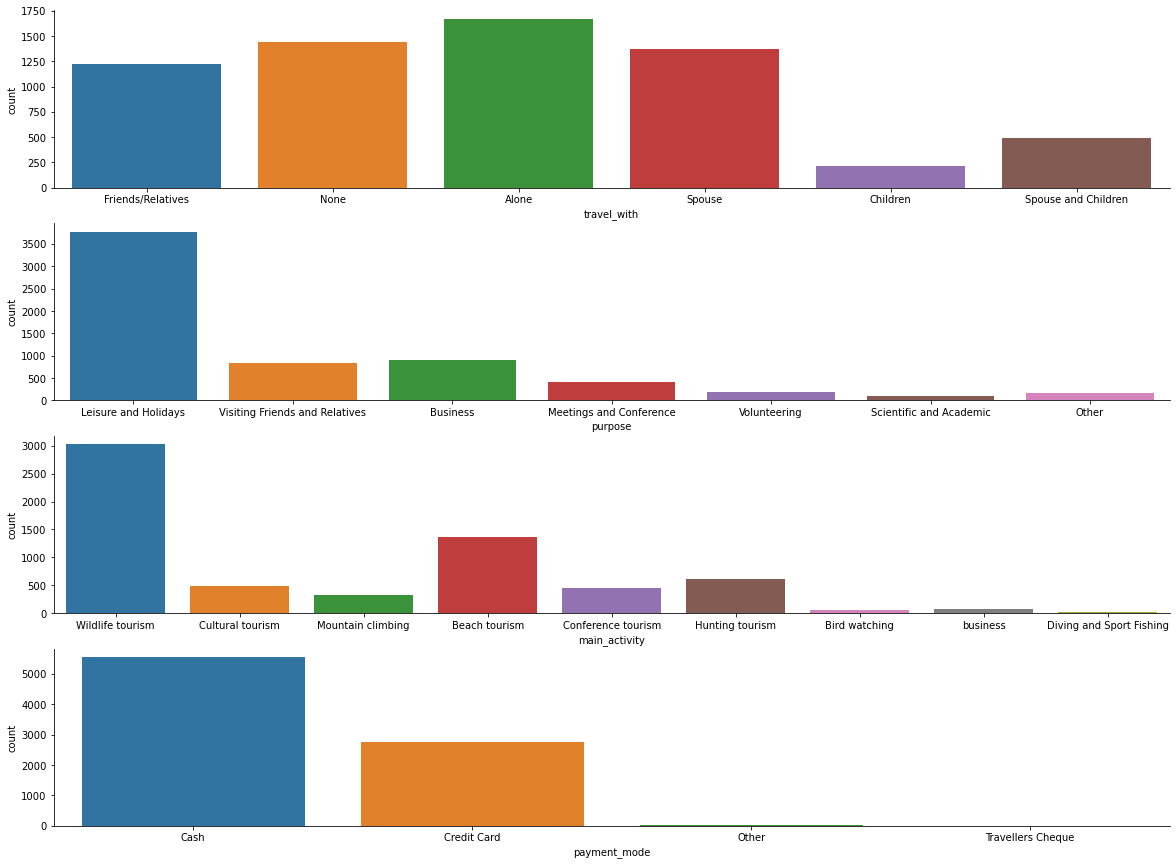

In [66]:
fig, ax = plt.subplots(4,1)
fig.set_size_inches(20, 15)
sns.countplot(df3['travel_with'], ax=ax[0])
sns.countplot(df3['purpose'], ax=ax[1])
sns.countplot(df3['main_activity'], ax=ax[2])
sns.countplot(df3['package_food'], ax=ax[3])
sns.countplot(df3['payment_mode'])
sns.despine()
fig.show()

In [67]:
average_night_zanzibar = df3['night_zanzibar'].mean()
average_night_mainland = df3['night_mainland'].mean()
print (average_night_zanzibar)
print (average_night_mainland)

2.3521060842433696
8.551326053042121


In [68]:
# Visualize the new data set

C:\Users\Kim-StoneBridge\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Kim-StoneBridge\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


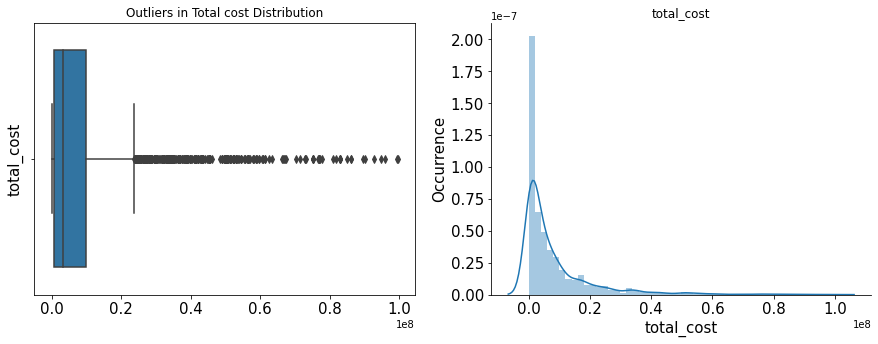

In [69]:
fig,(ax1,ax2)=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.boxplot(x='total_cost',data=df3,orient='v',ax=ax1)
ax1.set_xlabel(' ',fontsize=15)
ax1.set_ylabel('total_cost',fontsize=15)
ax1.set_title('Outliers in Total cost Distribution')
ax1.tick_params(labelsize=15)

sns.distplot(df3['total_cost'],ax=ax2)
ax2.set_xlabel('total_cost',fontsize=15)
ax2.set_ylabel('Occurrence',fontsize=15)
ax2.set_title("total_cost")
sns.despine(ax=ax2)
ax2.tick_params(labelsize=15)

C:\Users\Kim-StoneBridge\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Kim-StoneBridge\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


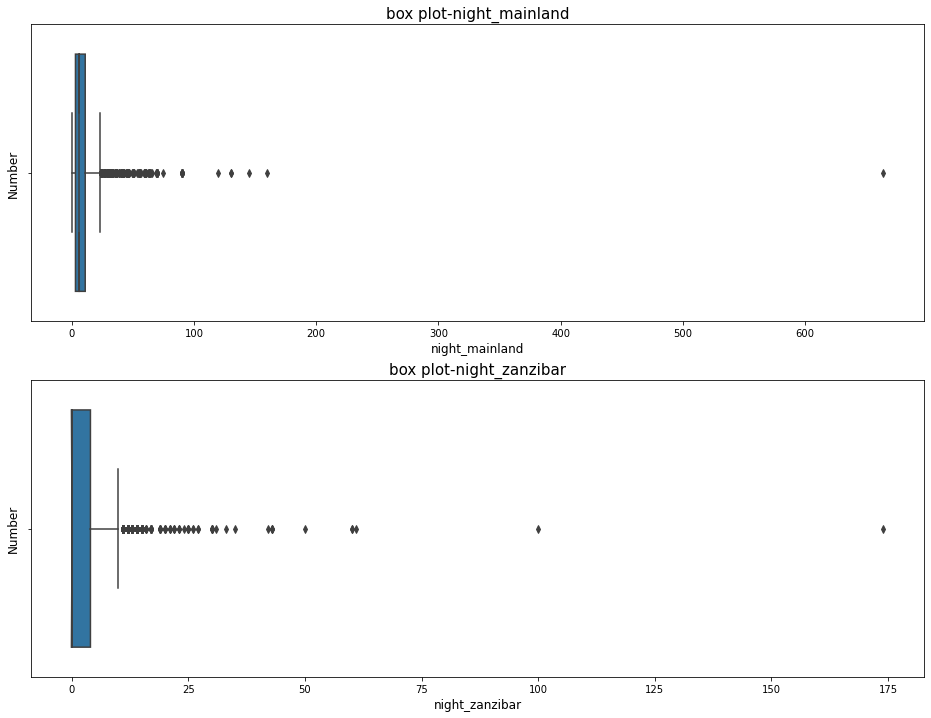

In [70]:
#checking for outliers using box plot
col_names = ['night_mainland', 'night_zanzibar']
fig, ax=plt.subplots(len(col_names), figsize=(16,12))
for i, col_val in enumerate(col_names):
    sns.boxplot(df3[col_val], notch= True, ax=ax[i])
    ax[i].set_title ('box plot-'+ col_val, fontsize= 15)
    ax[i].set_xlabel(col_val, fontsize= 12)
    ax[i].set_ylabel('Number', fontsize= 12)

plt.show()  

In [71]:
# # here we define a function for treating outliers
# def treat_outlier(df3, col):
#     Q1 = df3[col].quantile(0.25)
#     Q3 = df3[col].quantile(0.75)
#     IQR = Q3 - Q1
#     print('First quantile: ', Q1)
#     print('Third quantile: ', Q3)
#     print('IQR: ', IQR)
#     lower_bound = Q1 - 1.5*IQR
#     upper_bound = Q3 + 1.5*IQR
#     print('Lower bound: ', lower_bound, 'Upper bound: ', upper_bound)

In [72]:
# Defining a function to treat outliers
# here we define a function for treating outliers
def treat_outliers(df3, col):
    Q1 = df3[col].quantile(0.25)
    Q3 = df3[col].quantile(0.75)
    IQR = Q3 - Q1
    print('First quantile: ', Q1)
    print('Third quantile: ', Q3)
    print('IQR: ', IQR)
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    print('Lower bound: ', lower_bound)
    print('Upper bound: ', upper_bound)

In [73]:
treat_outliers(df3, 'total_cost')

First quantile:  812175.0
Third quantile:  9945000.0
IQR:  9132825.0
Lower bound:  -12887062.5
Upper bound:  23644237.5


In [74]:
df3[(df3['total_cost'] > -12887062.5) & (df3['total_cost'] < 23644237.5 )].head(2)

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,None,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5


In [75]:
treat_outliers(df3,'night_mainland')

First quantile:  3.0
Third quantile:  11.0
IQR:  8.0
Lower bound:  -9.0
Upper bound:  23.0


In [76]:
df3[(df3['night_mainland'] > -9.0) & (df3['night_mainland'] < 23.0 )].head(3)

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,None,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0


In [77]:
treat_outliers(df3, 'night_zanzibar')

First quantile:  0.0
Third quantile:  4.0
IQR:  4.0
Lower bound:  -6.0
Upper bound:  10.0


## Top 5 countries with the highest spending statistic

<AxesSubplot:xlabel='country'>

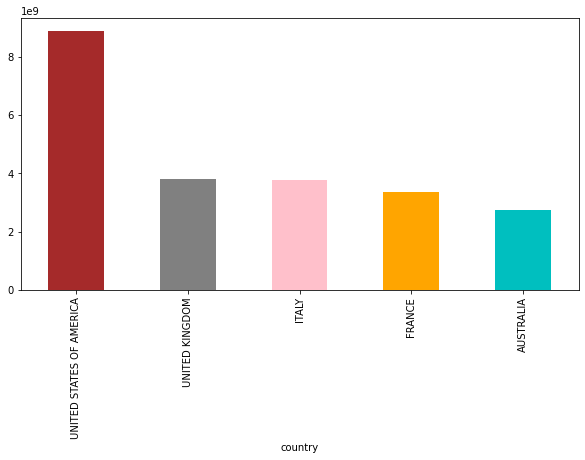

In [78]:
df3.groupby('country')['total_cost'].sum().nlargest().plot(kind='bar', color =['brown','grey','pink','orange','c'], figsize=(10,5))

### The highest spenders and who are the over all highest spenders by travel with

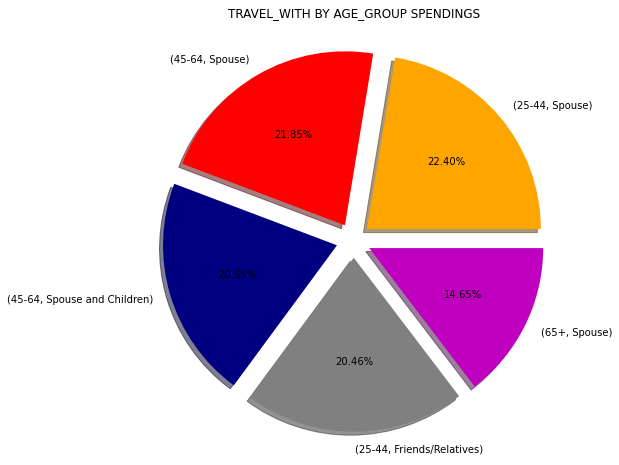

In [79]:
#which age-group are the highest spenders and who are the over all highest spenders by travel with?
ag_sp_tw = df3.groupby(['age_group','travel_with'])['total_cost'].sum().nlargest().plot(kind='pie',
autopct = '%1.2f%%',colors=['orange','red','navy','grey','m'],title='TRAVEL_WITH BY AGE_GROUP SPENDINGS',
explode = (0.1,0.1,0.1,0.1,0.1),shadow = True, figsize=[8,8],ylabel = ' ',)

### Which country have the most spending tourists?

<AxesSubplot:xlabel='country'>

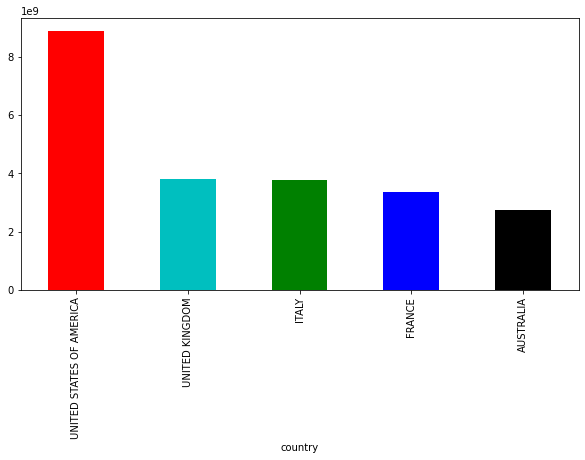

In [80]:
df3.groupby(['country'])['total_cost'].sum().nlargest().plot(kind='bar', color=('r','c','g','b','k'), figsize=(10,5))

### The most prefered payment mode by tourists

<AxesSubplot:title={'center':'MOST PREFERRED MODE OF PAYMENT'}, xlabel='payment_mode'>

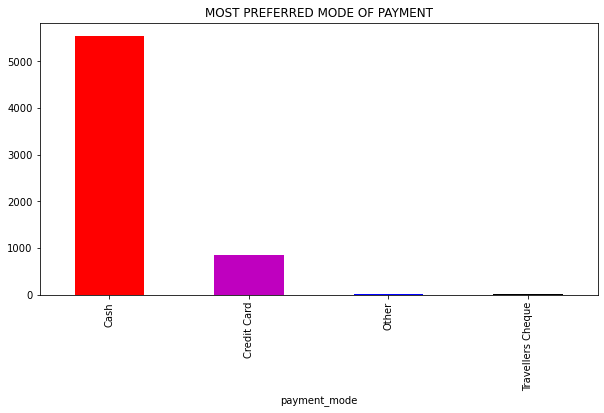

In [81]:
df3.groupby('payment_mode')['payment_mode'].count().nlargest().plot(kind='bar',title='MOST PREFERRED MODE OF PAYMENT',
color=['red','m','b','k'], figsize=(10,5),)

In [82]:
df3[(df3['night_zanzibar'] >  -6.0) & (df3['night_zanzibar'] < 10 )].head(3)

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,None,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0


In [83]:
from pandas_profiling import ProfileReport

In [84]:
df3.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [85]:
#Label Encoding
#We now do some encoding techniques where by we perform label encoding first.
# Label encoding involves converting labels into numeric form so as to have it into a machine-readable form.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df3['age_group'] = le.fit_transform(df3['age_group'])
df3['package_transport_int'] = le.fit_transform(df3['package_transport_int'])
df3['package_accomodation'] = le.fit_transform(df3['package_accomodation'])
df3['package_food'] = le.fit_transform(df3['package_food'])
df3['package_transport_tz'] = le.fit_transform(df3['package_transport_tz'])
df3['package_sightseeing'] = le.fit_transform(df3['package_sightseeing'])
df3['package_guided_tour'] = le.fit_transform(df3['package_guided_tour'])
df3['package_insurance'] = le.fit_transform(df3['package_insurance'])
df3['first_trip_tz'] = le.fit_transform(df3['first_trip_tz'])
df3['country'] = le.fit_transform(df3['country'])

In [86]:
columns_to_transform = ['tour_arrangement','travel_with','purpose','main_activity','info_source','most_impressing','payment_mode']
data3 = pd.get_dummies( data=df3,columns = columns_to_transform,drop_first=True)
data3.head()

,ID,country,age_group,total_female,total_male,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,...,most_impressing_Excellent Experience,most_impressing_Friendly People,most_impressing_Good service,most_impressing_No comments,most_impressing_None,most_impressing_Satisfies and Hope Come Back,"most_impressing_Wonderful Country, Landscape, Nature",payment_mode_Credit Card,payment_mode_Other,payment_mode_Travellers Cheque
0,tour_0,101,3,1.0,1.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,tour_10,111,2,1.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,tour_1000,111,2,0.0,1.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,tour_1002,111,2,1.0,1.0,0,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0
4,tour_1004,17,0,1.0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [87]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6410 entries, 0 to 6409
Data columns (total 53 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   ID                                                    6410 non-null   object 
 1   country                                               6410 non-null   int32  
 2   age_group                                             6410 non-null   int32  
 3   total_female                                          6410 non-null   float64
 4   total_male                                            6410 non-null   float64
 5   package_transport_int                                 6410 non-null   int32  
 6   package_accomodation                                  6410 non-null   int32  
 7   package_food                                          6410 non-null   int32  
 8   package_transport_tz                                  6410

In [88]:
## convert float dtypes to int
data3["total_female"] = data3['total_female'].astype('int')
data3["total_male"] = data3['total_male'].astype('int')
data3["night_mainland"] = data3['night_mainland'].astype('int')
data3["night_zanzibar"] = data3['night_zanzibar'].astype('int')

In [89]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6410 entries, 0 to 6409
Data columns (total 53 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   ID                                                    6410 non-null   object 
 1   country                                               6410 non-null   int32  
 2   age_group                                             6410 non-null   int32  
 3   total_female                                          6410 non-null   int32  
 4   total_male                                            6410 non-null   int32  
 5   package_transport_int                                 6410 non-null   int32  
 6   package_accomodation                                  6410 non-null   int32  
 7   package_food                                          6410 non-null   int32  
 8   package_transport_tz                                  6410

In [90]:
## separate data into train and test
train_df=data3[data3.total_cost.notnull()].reset_index(drop=True)
test_df=data3[data3.total_cost.isna()].reset_index(drop=True)

In [91]:
print(train_df.shape)
print(test_df.shape)

(4809, 53)
(1601, 53)


## Modelling
Here is where we create a model that we'll train on with our training set so as to aid us in making our desired predictions. Since model is a linear regression problem hence we'll need to use a regression algorithm to solve it. we used a catboost Regressor model to train and give our prediction.

In [92]:
feat_cols = train_df.drop(["ID","total_cost"],1)
cols = feat_cols.columns
target=train_df["total_cost"]
target

C:\Users\Kim-StoneBridge\AppData\Local\Temp\ipykernel_11728\1215716053.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  feat_cols = train_df.drop(["ID","total_cost"],1)


0         674602.5
1        3214906.5
2        3315000.0
3        7790250.0
4        1657500.0
           ...    
4804     3315000.0
4805    10690875.0
4806     2246636.7
4807     1160250.0
4808    13260000.0
Name: total_cost, Length: 4809, dtype: float64

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score

In [94]:
# create training and testing variables
X_train, X_test, y_train, y_test = train_test_split(train_df[cols],target, test_size=0.25, random_state = 42)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(3606, 51) (3606,)
(1203, 51) (1203,)


In [95]:
from catboost import CatBoostRegressor
predictions = []
for i in range(10):
  # Training the model
  ct=CatBoostRegressor(iterations=1000, 
                    loss_function='MAE',
                    logging_level='Silent',
                    depth = i
                    )
ct.fit(X_train, y_train)

In [96]:
 # Making predictions
preds = ct.predict(X_test)
predictions.append(preds)

# Averaging the predictions
preds = np.mean(predictions, axis = 0)
preds

array([ 8233305.02289909,  2317407.64662719,  1457269.76323008, ...,
       29050257.52805029,  3157696.84115526,   968832.17848112])

In [97]:
# Model evaluation
from sklearn.metrics import mean_absolute_error 
mae = mean_absolute_error(y_test, preds)**0.5
print('Error {}'.format(mae))

Error 2172.277367373417


In [98]:
# Doing our prediction.
sub = test_df[cols]
predictions_ct = ct.predict(sub)
predictions_ct

array([22309092.63808678,  6492313.95410336, 17840899.02866255, ...,
        1198712.81059309,   453588.38756364,  4244609.55242965])

In [99]:
from sklearn.model_selection import  train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from catboost import CatBoostRegressor
import math

In [103]:

#RMSE
Rmse_test = math.sqrt(mean_squared_error(y_test,preds))

#R2 Score
r2_test = r2_score(y_test,preds)

# Adjusted R2 Score
n= X_train.shape[0] # total no of datapoints
p= X_train.shape[1] # total no of independent features
adj_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)

#print results
mae = mean_absolute_error(y_test, preds)**0.5
print('Error {}'.format(mae))
print("Evaluation on test data")
print("RMSE: {:.2f}".format(Rmse_test))
print('R2: {:.2f}'.format(r2_test))
print("Adjusted R2: {:.2f}".format(adj_r2_test))

Error 2172.277367373417
Evaluation on test data
RMSE: 9283212.90
R2: 0.40
Adjusted R2: 0.40


In [104]:
new_prices = test_df.assign(predicted_prices = predictions_ct)
new_prices.head()

,ID,country,age_group,total_female,total_male,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,...,most_impressing_Friendly People,most_impressing_Good service,most_impressing_No comments,most_impressing_None,most_impressing_Satisfies and Hope Come Back,"most_impressing_Wonderful Country, Landscape, Nature",payment_mode_Credit Card,payment_mode_Other,payment_mode_Travellers Cheque,predicted_prices
0,tour_1,3,3,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,2.230909e+07
1,tour_100,95,2,0,4,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,6.492314e+06
2,tour_1001,35,2,3,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1.784090e+07
3,tour_1006,14,1,2,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,3.529052e+06
4,tour_1009,111,3,2,2,1,1,1,1,0,...,1,0,0,0,0,0,0,0,0,2.015888e+07
